 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

In [2]:
# Set the file paths
algo_path = Path("../Starter_Code/Resources/algo_returns.csv")
whale_path = Path("../Starter_Code/Resources/whale_returns.csv")
sp500_path = Path("../Starter_Code/Resources/sp500_history.csv")

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_df = pd.read_csv(whale_path)
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_df = whale_df.dropna().copy()
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [6]:
# Sort the index
whale_df.sort_index(inplace=True)
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [7]:
whale_df.tail()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
1059,2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833


In [8]:
whale_df.dtypes

Date                            object
SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [9]:
# Fix Data Types
whale_df["Date"] = pd.to_datetime(whale_df["Date"])
whale_df.dtypes

Date                           datetime64[ns]
SOROS FUND MANAGEMENT LLC             float64
PAULSON & CO.INC.                     float64
TIGER GLOBAL MANAGEMENT LLC           float64
BERKSHIRE HATHAWAY INC                float64
dtype: object

In [10]:
# Sort by Date as Index
whale_df = whale_df.set_index("Date")
whale_df.sort_values(by="Date", inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [11]:
# Reading algorithmic returns
algo_df = pd.read_csv(algo_path)
algo_df.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [12]:
# Count nulls
algo_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [13]:
# Drop nulls
algo_df = algo_df.dropna().copy()
algo_df.head()

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761


In [14]:
algo_df.dtypes

Date       object
Algo 1    float64
Algo 2    float64
dtype: object

In [15]:
# Fix Data Types
algo_df["Date"] = pd.to_datetime(algo_df["Date"])
algo_df.dtypes

Date      datetime64[ns]
Algo 1           float64
Algo 2           float64
dtype: object

In [16]:
# Sort the index
algo_df.sort_index(inplace=True)
algo_df.head()

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761


In [17]:
algo_df.tail()

,Date,Algo 1,Algo 2
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570
1240,2019-05-01,0.000094,-0.007358


In [18]:
# Sort by Date as Index
algo_df = algo_df.set_index("Date")
algo_df.sort_values(by="Date", inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [19]:
# Reading S&P 500 Closing Prices
sp500_df = pd.read_csv(sp500_path)
sp500_df.head(10)

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06
5,15-Apr-19,$2905.58
6,12-Apr-19,$2907.41
7,11-Apr-19,$2888.32
8,10-Apr-19,$2888.21
9,9-Apr-19,$2878.20


In [20]:
# Check Data Types
sp500_df.dtypes

Date     object
Close    object
dtype: object

In [21]:
# Fix Data Types
sp500_df["Date"] = pd.to_datetime(sp500_df["Date"])
sp500_df['Close'] = sp500_df['Close'].str.replace("$", "")
sp500_df['Close'] = sp500_df['Close'].astype('float')
sp500_df.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [22]:
# Sort by Date as Index
sp500_df = sp500_df.set_index("Date")
sp500_df.sort_values(by="Date", inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [23]:
# Calculate Daily Returns
sp500_returns = sp500_df.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [24]:
# Drop nulls
sp500_returns = sp500_df.pct_change().dropna()
sp500_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [25]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns = sp500_returns.rename(columns={"Close":"S&P 500"})
sp500_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [26]:
sp500_returns.tail()

,S&P 500
Date,
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579
2019-04-22,0.001012
2019-04-23,0.008841


In [27]:
# Sort the indexes
whale_df.sort_index(inplace=True)
algo_df.sort_index(inplace=True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [28]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_data_cols = pd.concat([whale_df, algo_df, sp500_returns], axis='columns', join='inner')
joined_data_cols

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

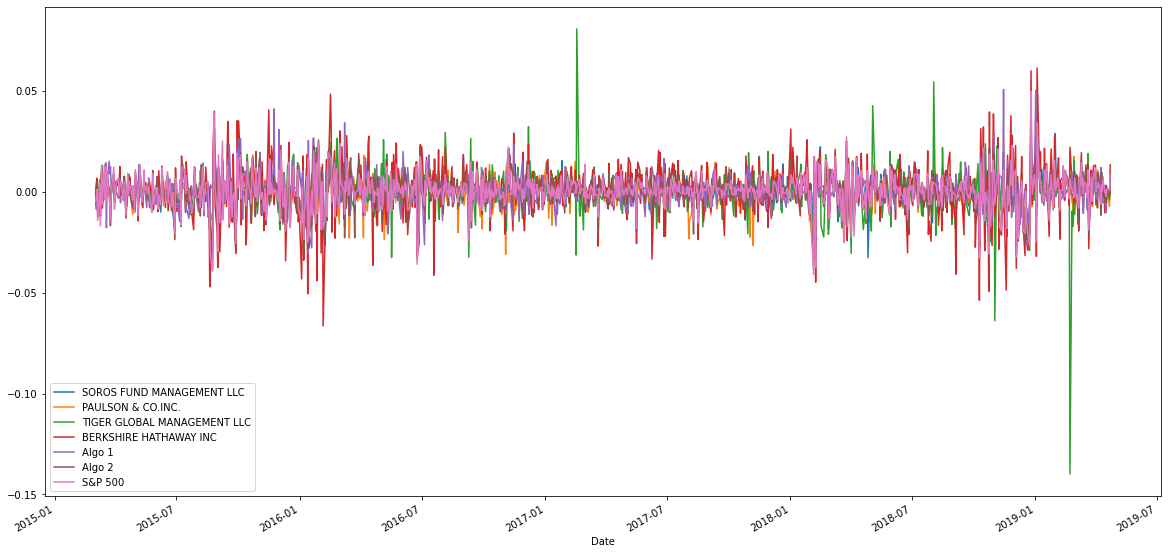

In [29]:
# Plot daily returns of all portfolios
joined_data_cols.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

In [30]:
# Calculate cumulative returns of all portfolios
cum_returns = (1+joined_data_cols).cumprod(axis=0)
print(cum_returns)

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                   0.998734            0.995019   
2015-03-04                   1.000962            0.998245   
2015-03-05                   1.004981            1.002314   
2015-03-06                   0.997037            0.998731   
2015-03-09                   0.997617            1.002951   
...                               ...                 ...   
2019-04-16                   1.160965            0.786811   
2019-04-17                   1.157602            0.781723   
2019-04-18                   1.159278            0.782678   
2019-04-22                   1.156280            0.776939   
2019-04-23                   1.164568            0.779646   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                     0.999504             

<AxesSubplot:xlabel='Date'>

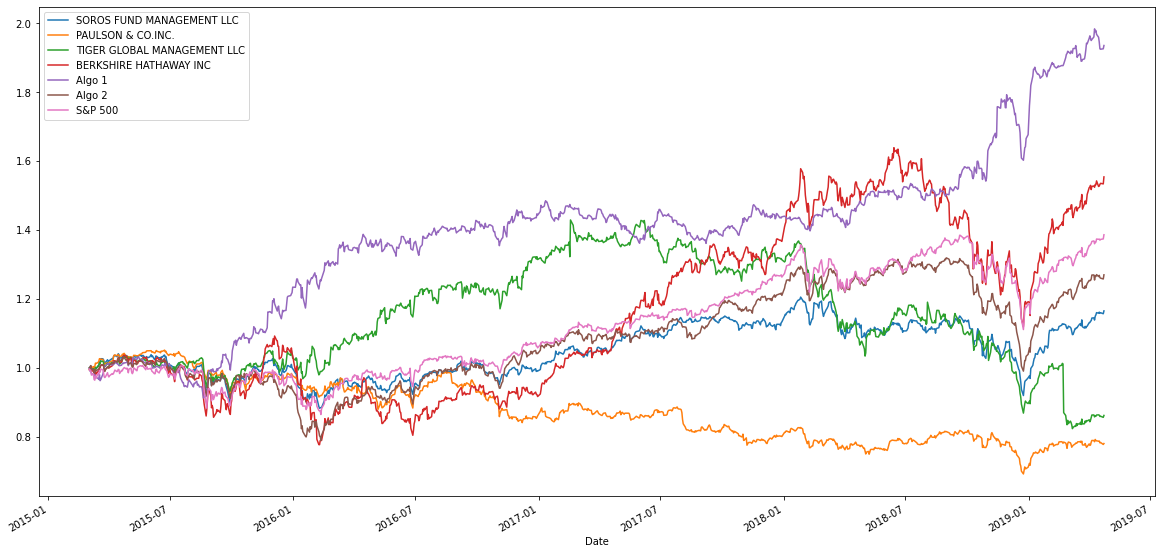

In [31]:
# Plot cumulative returns
cum_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

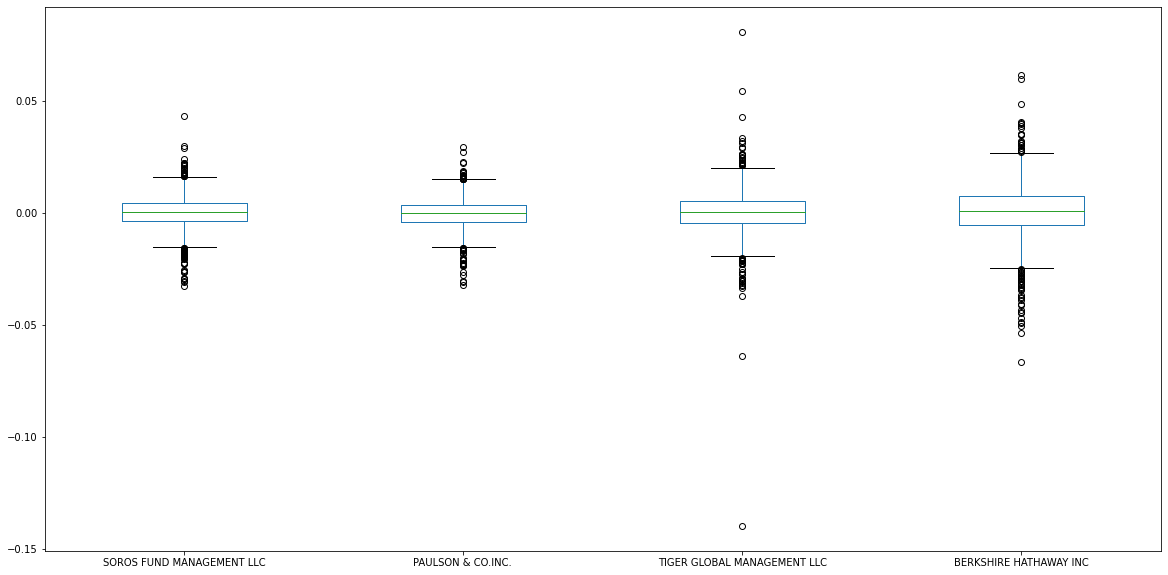

In [32]:
# Box plot to visually show risk
whale_df.plot(kind='box', figsize=(20,10))

<AxesSubplot:>

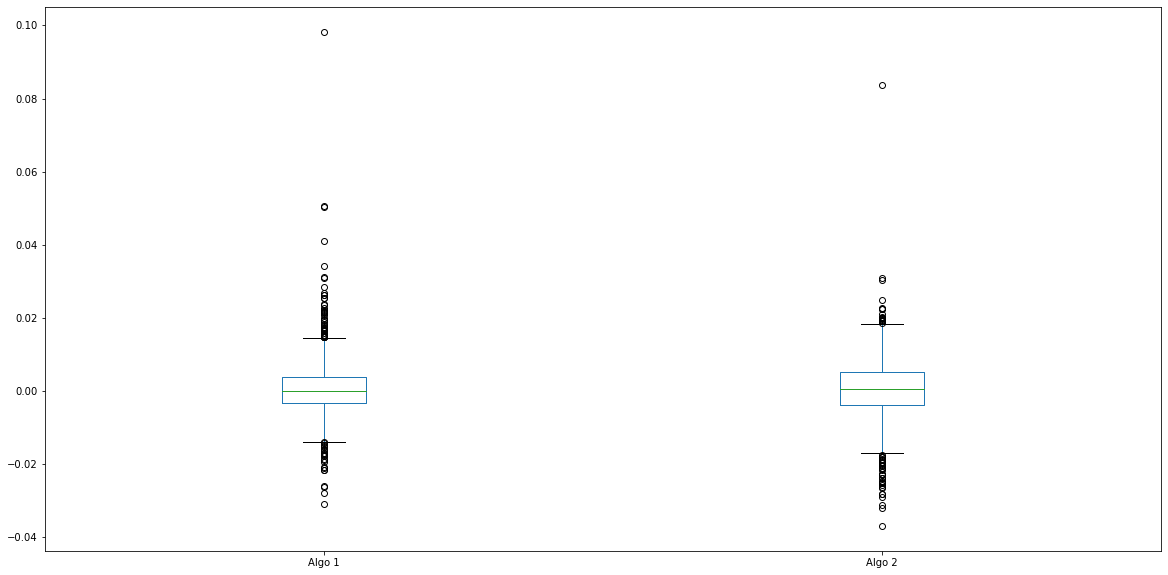

In [33]:
algo_df.plot(kind='box', figsize=(20,10))

<AxesSubplot:>

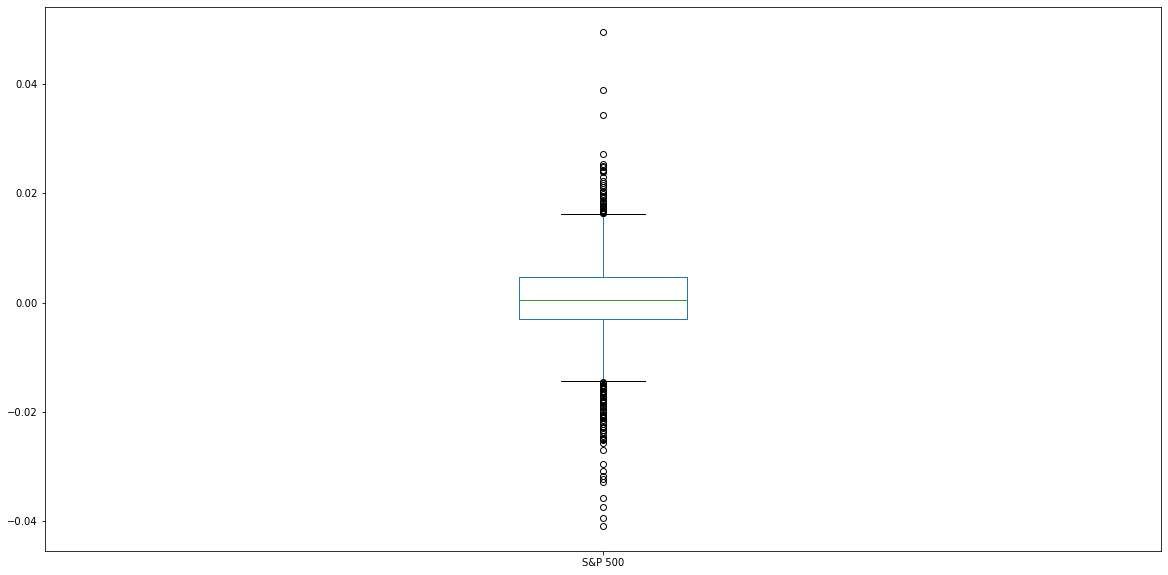

In [34]:
sp500_returns.plot(kind='box', figsize=(20,10))

### Calculate Standard Deviations

In [35]:
# Calculate the daily standard deviations of all portfolios
daily_std = joined_data_cols.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [36]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = sp500_returns.std()
sp500_std.head()

S&P 500    0.008111
dtype: float64

In [37]:
# Determine which portfolios are riskier than the S&P 500
daily_std = daily_std.sort_values(ascending=False)
daily_std.head()

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500                        0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
dtype: float64

In [38]:
print(f"The portfolios that are riskier than the S&P 500 are Berkshire Hathaway with a standard deviation of ", str(daily_std[0]), "and Tiger Global with a standard deviation of ", str(daily_std[1]))

The portfolios that are riskier than the S&P 500 are Berkshire Hathaway with a standard deviation of  0.012918618441883524 and Tiger Global with a standard deviation of  0.010893969618743032


### Calculate the Annualized Standard Deviation

In [39]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P 500                        0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [40]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
joined_data_cols.rolling(window=21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006470


<AxesSubplot:xlabel='Date'>

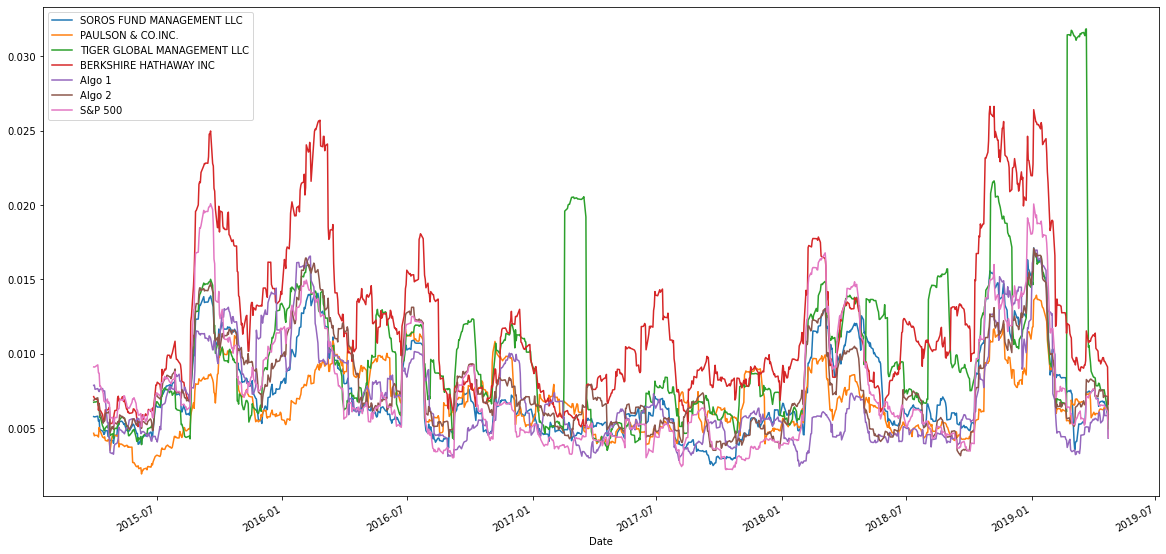

In [41]:
# Plot the rolling standard deviation
joined_data_cols.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

In [42]:
# Calculate the correlation
correlation = joined_data_cols.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:>

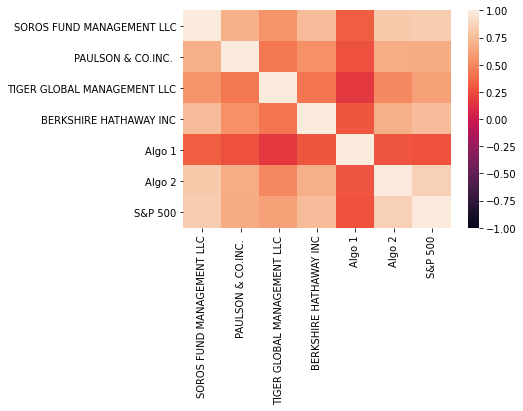

In [43]:
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [44]:
# Calculate covariance of a single portfolio
soros_covariance = joined_data_cols["SOROS FUND MANAGEMENT LLC"].cov(joined_data_cols["S&P 500"])
soros_covariance

5.658503197203636e-05

In [45]:
# Calculate covariance of a single portfolio
paul_covariance = joined_data_cols["PAULSON & CO.INC. "].cov(joined_data_cols["S&P 500"])
paul_covariance

4.0233150936527375e-05

In [46]:
# Calculate covariance of a single portfolio
tiger_covariance = joined_data_cols["TIGER GLOBAL MANAGEMENT LLC"].cov(joined_data_cols["S&P 500"])
tiger_covariance

5.8141830323050995e-05

In [47]:
# Calculate covariance of a single portfolio
berkshire_covariance = joined_data_cols["BERKSHIRE HATHAWAY INC"].cov(joined_data_cols["S&P 500"])
berkshire_covariance

8.302834941861689e-05

In [48]:
# Calculate covariance of a single portfolio
algo1_covariance = joined_data_cols["Algo 1"].cov(joined_data_cols["S&P 500"])
algo1_covariance

1.821774999163282e-05

In [49]:
# Calculate covariance of a single portfolio
algo2_covariance = joined_data_cols["Algo 2"].cov(joined_data_cols["S&P 500"])
algo2_covariance

6.127932374145016e-05

In [50]:
# Calculate variance of S&P 500
variance = joined_data_cols["S&P 500"].var()
variance

7.316632424648712e-05

In [51]:
# Computing beta
soros_beta = soros_covariance/variance
paul_beta = paul_covariance/variance
tiger_beta = tiger_covariance/variance
berkshire_beta = berkshire_covariance/variance
algo1_beta = algo1_covariance/variance
algo2_beta = algo2_covariance/variance
print(f"SOROS FUND MANAGEMENT LLC : {soros_beta} | PAULSON & CO.INC.: {paul_beta} | TIGER GLOBAL MANAGEMENT LLC : {tiger_beta} | BERKSHIRE HATHAWAY LLC : {berkshire_beta} | Algo 1 : {algo1_beta} | Algo 2 : {algo2_beta}")

SOROS FUND MANAGEMENT LLC : 0.7733753547794652 | PAULSON & CO.INC.: 0.5498861853574537 | TIGER GLOBAL MANAGEMENT LLC : 0.7946528805681052 | BERKSHIRE HATHAWAY LLC : 1.1347891297491723 | Algo 1 : 0.2489909145942574 | Algo 2 : 0.8375345402757788


<AxesSubplot:title={'center':'Rolling 60-day Beta of Berkshire Hathaway Inc'}, xlabel='Date'>

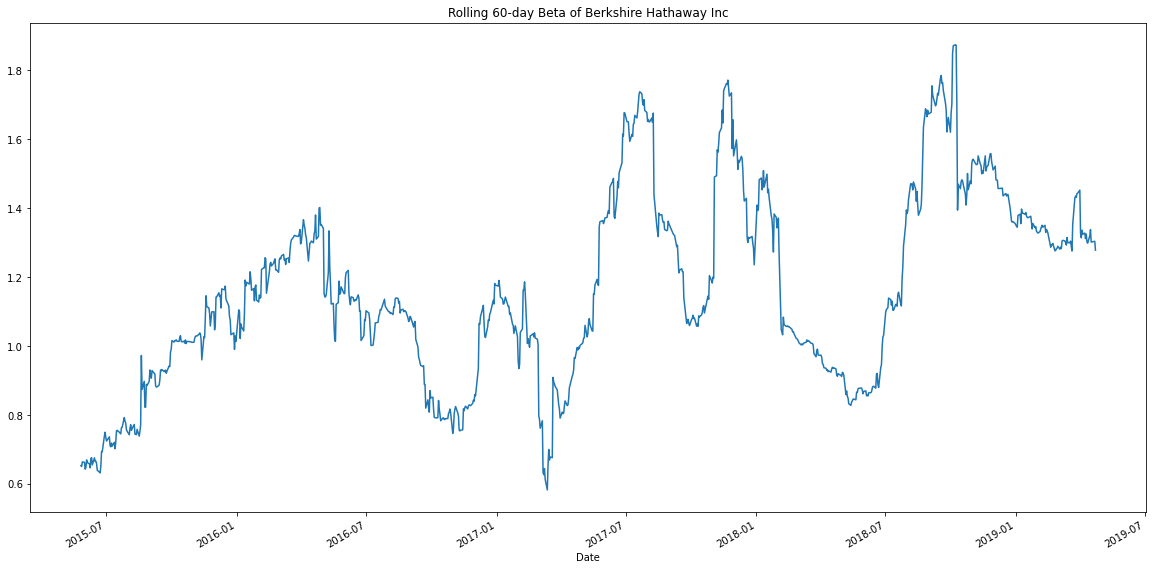

In [52]:
# Computing 60-day rolling beta of Berkshire Hathaway and S&P 500
rolling_covariance = joined_data_cols["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(joined_data_cols["S&P 500"])
rolling_variance = joined_data_cols["S&P 500"].rolling(window=60).var()
rolling_beta = rolling_covariance/rolling_variance

# Plot beta trend
rolling_beta.plot(figsize=(20,10), title = "Rolling 60-day Beta of Berkshire Hathaway Inc")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

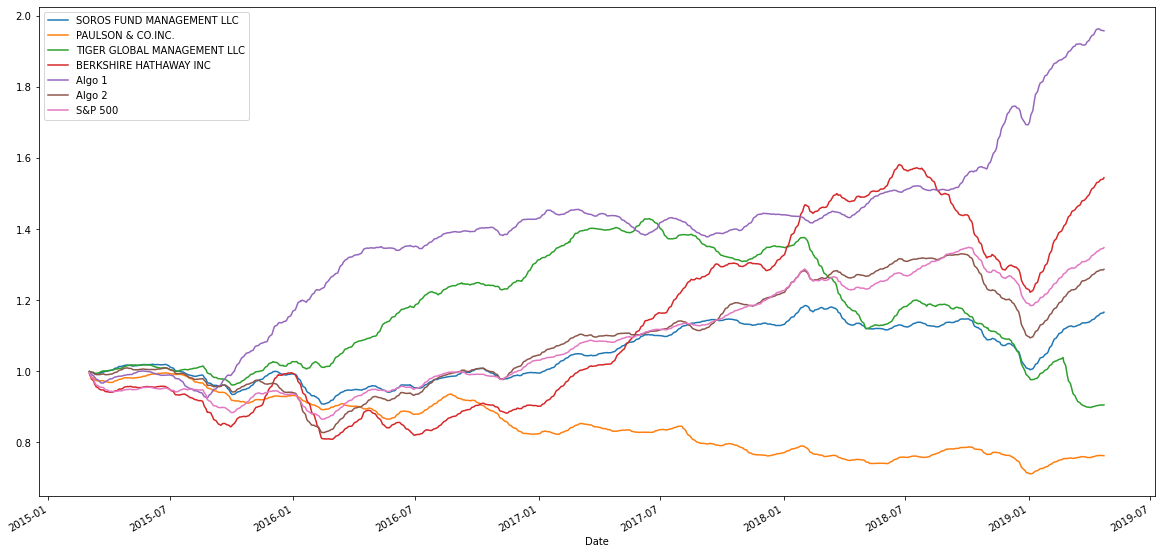

In [53]:
# Use `ewm` to calculate the rolling window
joined_data_ewm = joined_data_cols.ewm(span = 21,adjust = False).mean()
(1+joined_data_ewm).cumprod().plot(figsize = (20,10))


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [54]:
# Annualized Sharpe Ratios
sharpe_ratios = joined_data_cols.mean()*252 /(joined_data_cols.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

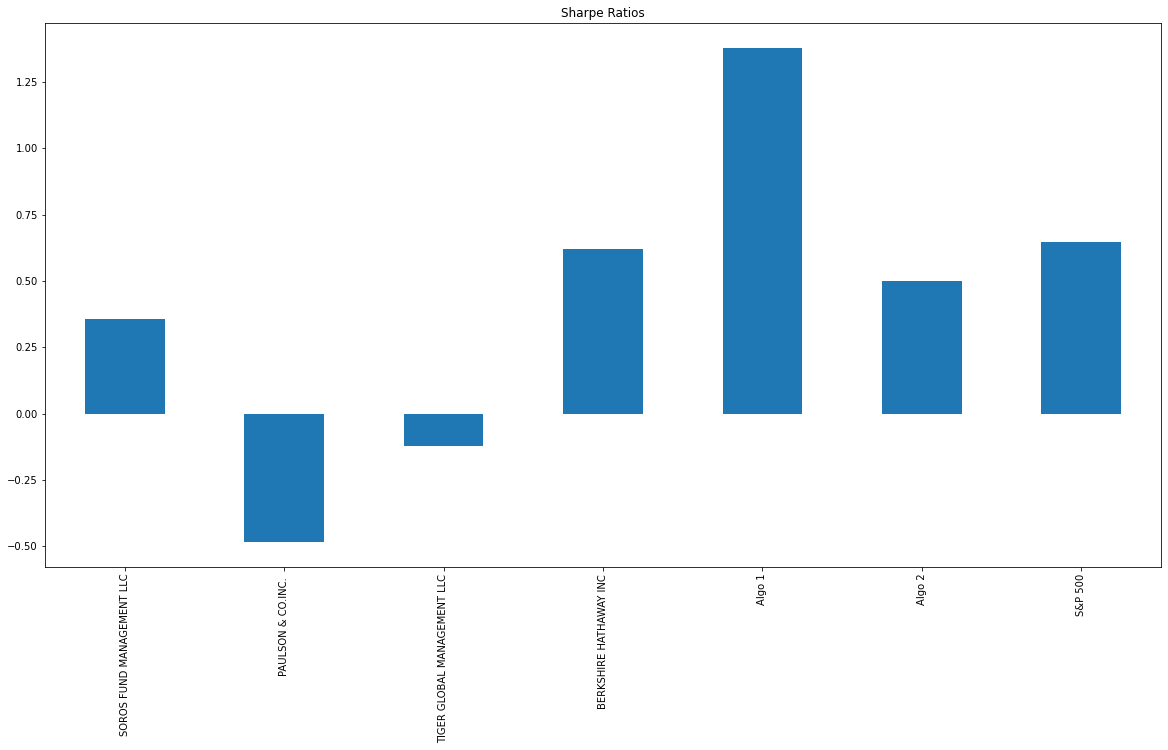

In [55]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", figsize=(20,10), title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

The algorithmic strategy 1 outperformed both the S&P 500 and the whales portfolios by a huge margin.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [56]:
# Set the file paths
goog_path = Path("../Starter_Code/Resources/goog_historical.csv")
aapl_path = Path("../Starter_Code/Resources/aapl_historical.csv")
cost_path = Path("../Starter_Code/Resources/cost_historical.csv")

In [57]:
# Reading data from 1st stock
aapl_df = pd.read_csv(aapl_path, index_col='Trade DATE', parse_dates=True)
aapl_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [58]:
# Reading data from 2nd stock
goog_df = pd.read_csv(goog_path, index_col='Trade DATE', parse_dates=True)
goog_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [59]:
# Reading data from 3rd stock
cost_df = pd.read_csv(cost_path, index_col='Trade DATE', parse_dates=True)
cost_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [60]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([aapl_df, goog_df, cost_df], axis='columns', join='inner')
combined_df.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,AAPL,200.72,GOOG,1162.38,COST,243.47
2019-05-08,AAPL,202.90,GOOG,1166.27,COST,241.34
2019-05-07,AAPL,202.86,GOOG,1174.10,COST,240.18
2019-05-06,AAPL,208.48,GOOG,1189.39,COST,244.23
2019-05-03,AAPL,211.75,GOOG,1185.40,COST,244.62


In [61]:
# Reset Date index
combined_df.sort_index(inplace=True)

In [62]:
# Reorganize portfolio data by having a column per symbol
combined_df.columns = ["Symbol", "AAPL", "Symbol", "GOOG", "Symbol", "COST"]
combined_df.drop(columns=["Symbol"], inplace=True)
combined_df.head()

,AAPL,GOOG,COST
Trade DATE,,,
2018-05-11,188.59,1098.26,195.76
2018-05-14,188.15,1100.20,195.88
2018-05-15,186.44,1079.23,195.48
2018-05-16,188.18,1081.77,198.71
2018-05-17,186.99,1078.59,199.60


In [63]:
# Calculate daily returns
daily_returns = combined_df.pct_change()
daily_returns.head()

,AAPL,GOOG,COST
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.001766,0.000613
2018-05-15,-0.009088,-0.019060,-0.002042
2018-05-16,0.009333,0.002354,0.016523
2018-05-17,-0.006324,-0.002940,0.004479


In [64]:
# Drop NAs
daily_returns.dropna()

,AAPL,GOOG,COST
Trade DATE,,,
2018-05-14,-0.002333,0.001766,0.000613
2018-05-15,-0.009088,-0.019060,-0.002042
2018-05-16,0.009333,0.002354,0.016523
2018-05-17,-0.006324,-0.002940,0.004479
2018-05-18,-0.003637,-0.011339,-0.003206
...,...,...,...
2019-05-03,0.012431,0.019602,0.007953
2019-05-06,-0.015443,0.003366,-0.001594
2019-05-07,-0.026957,-0.012855,-0.016583


In [65]:
# Display sample data
daily_returns.head()

,AAPL,GOOG,COST
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.001766,0.000613
2018-05-15,-0.009088,-0.019060,-0.002042
2018-05-16,0.009333,0.002354,0.016523
2018-05-17,-0.006324,-0.002940,0.004479


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [66]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)


# Display sample data
portfolio_returns.head()

Trade DATE
2018-05-11         NaN
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [67]:
# Join your returns DataFrame to the original returns DataFrame
merged_df = pd.concat([joined_data_cols, portfolio_returns], axis="columns", join="inner")
merged_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,0
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,0.001708,NaN
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217


In [68]:
# Rename column
merged_df = merged_df.rename(columns={0: "My Portfolio"})
merged_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Portfolio
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,0.001708,NaN
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595


In [69]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
merged_df.dropna(inplace=True)
merged_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [70]:
# Calculate the annualized `std`
daily_std2 = merged_df.std()
annualized_std2 = daily_std2 *np.sqrt(252)
annualized_std2

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
My Portfolio                   0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

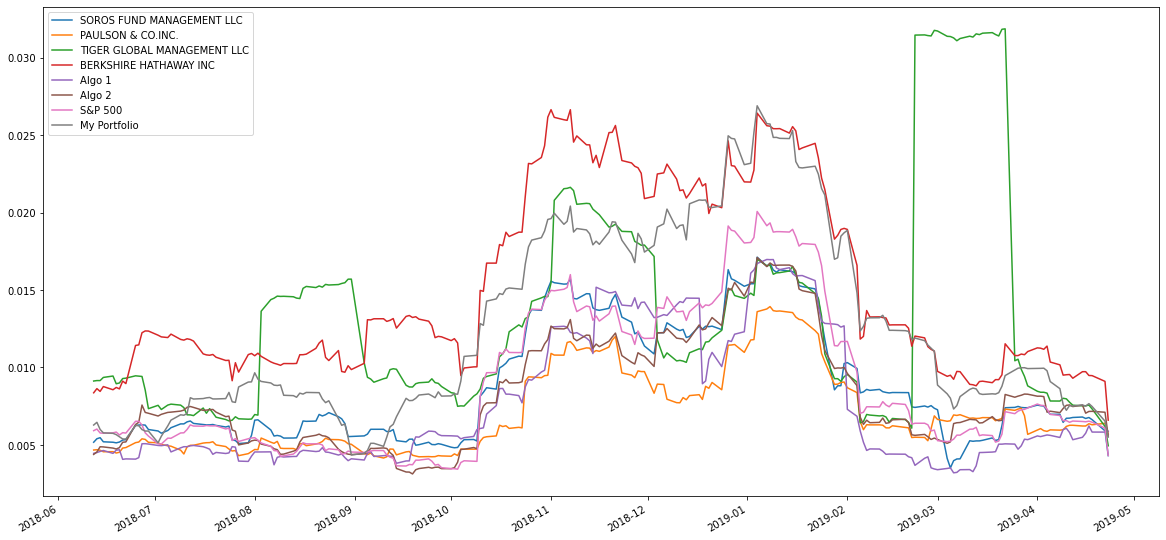

In [71]:
# Calculate rolling standard deviation
merged_df_roll = merged_df.rolling(window=21).std()
# Plot rolling standard deviation
merged_df_roll.plot(figsize=(20,10))

### Calculate and plot the correlation

In [72]:
# Calculate the correlation
correlation2 = merged_df.corr()
correlation2

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
S&P 500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
My Portfolio,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


<AxesSubplot:>

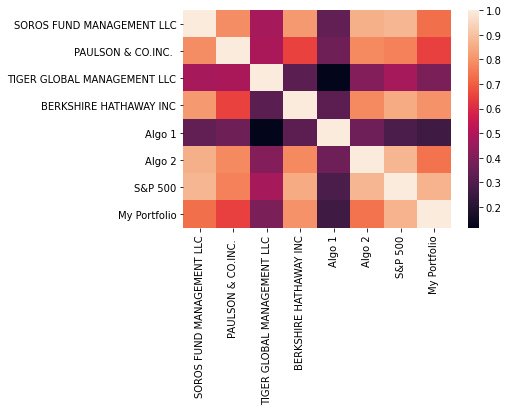

In [73]:
# Plot the correlation
sns.heatmap(correlation2)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [74]:
# Calculate and plot Beta
covariance2 = merged_df["My Portfolio"].cov(merged_df["S&P 500"])
variance2 = merged_df["S&P 500"].var()
my_portfolio_beta = covariance2/variance2

rolling_myport_covariance = merged_df["My Portfolio"].rolling(window=60).cov(merged_df["S&P 500"])
rolling_variance2 = merged_df["S&P 500"].rolling(window=60).var()
rolling_myport_beta = rolling_myport_covariance/rolling_variance2
rolling_myport_beta

2018-05-14         NaN
2018-05-15         NaN
2018-05-16         NaN
2018-05-17         NaN
2018-05-18         NaN
                ...   
2019-04-16    1.173574
2019-04-17    1.138133
2019-04-18    1.138551
2019-04-22    1.137941
2019-04-23    1.129204
Length: 237, dtype: float64

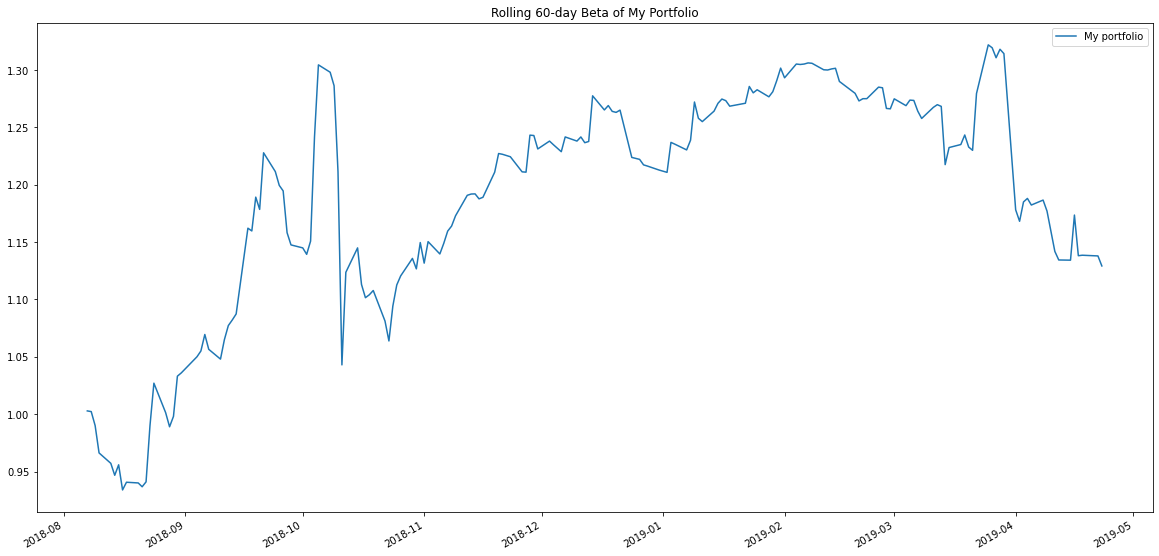

In [75]:
# Plot rolling 60-day betas of my portfolio
ax2 = rolling_myport_beta.plot(figsize=(20,10), title="Rolling 60-day Beta of My Portfolio")

# Set the legend of the figure
ax2.legend(["My portfolio"])

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [76]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios2= merged_df.mean()*252/(merged_df.std()*np.sqrt(252))
sharpe_ratios2

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
My Portfolio                   0.933123
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

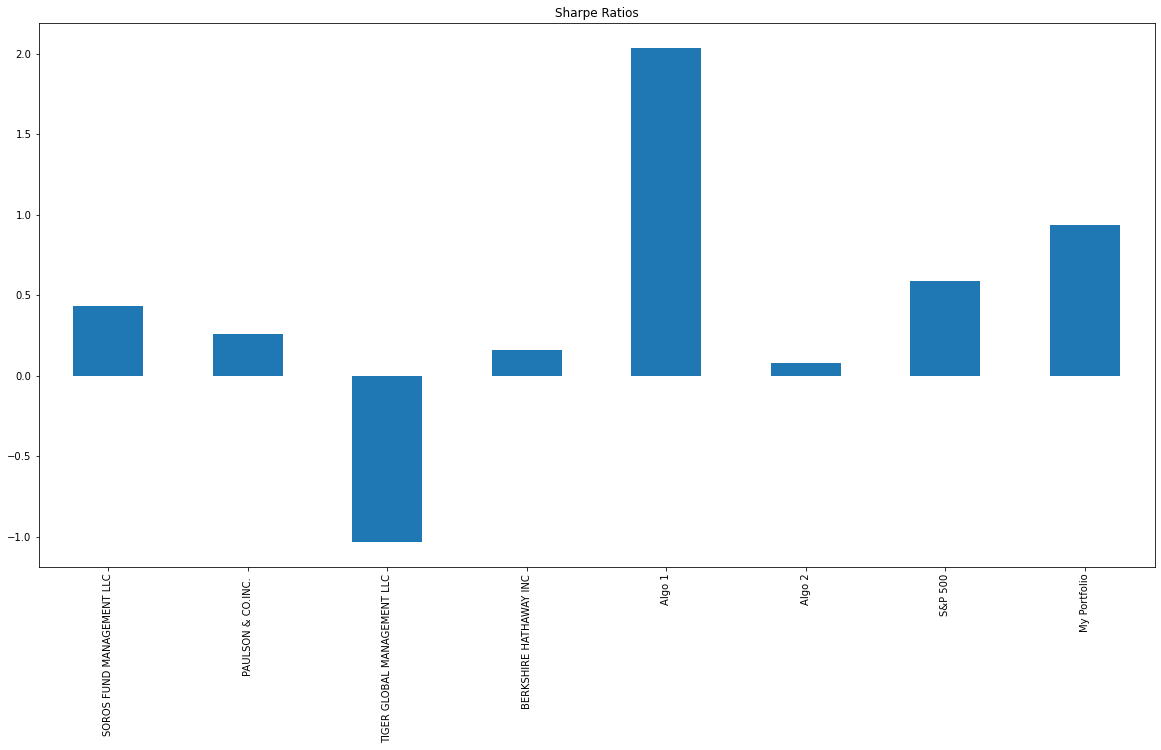

In [77]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios2.plot(kind="bar", figsize=(20,10), title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [79]:
print(f"My portfolio did great in the period 2018-2019, and was only behind by the algorithmic strategy 1, but beating out the rest of all the other portfolios.  It is also highly correlated with S&P 500 with a correlation of "+ str(correlation2["My Portfolio"].values[6]) + " but is more risky than the S&P 500 with a standard deviation of " + str(annualized_std2.values[-1]) + "." )

My portfolio did great in the period 2018-2019, and was only behind by the algorithmic strategy 1, but beating out the rest of all the other portfolios.  It is also highly correlated with S&P 500 with a correlation of 0.8718748101218109 but is more risky than the S&P 500 with a standard deviation of 0.21149550884465995.
